In [60]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
x = iris['data']
# print(x)
x_cen = x-x.mean(axis=0)
U,s,vt = np.linalg.svd(x_cen)
print(vt.T[:,:2])  #第一和第二主成分

[[ 0.36138659 -0.65658877]
 [-0.08452251 -0.73016143]
 [ 0.85667061  0.17337266]
 [ 0.3582892   0.07548102]]


In [61]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(x)
print(pca.components_.T[:,0])  #主成分的单位向量
print(pca.explained_variance_ratio_)


#随机PCA
rnd_pca = PCA(n_components=2,svd_solver='randomized')
x_reduced = rnd_pca.fit_transform(x)
# x_reduced

[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
[0.92461872 0.05306648]


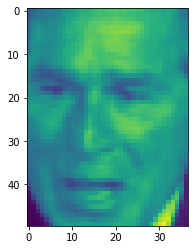

(50, 37)
(639, 1850) (639, 154)


In [62]:
#增量PCA
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA

lfw_people=fetch_lfw_people(min_faces_per_person=70,resize=0.4)
plt.imshow(lfw_people.images[0])
plt.show()
print(lfw_people.images[0].shape)
x = lfw_people.data
n_batchs = 3
inc_pca = IncrementalPCA(n_components = 154)
for x_batch in np.array_split(x,n_batchs):
    inc_pca.partial_fit(x_batch)
x_reduced = inc_pca.transform(x)

print(x.shape,x_reduced.shape)


In [59]:
#内核PCA与重构
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2,kernel = 'rbf',gamma = 0.04)
x_reduced = rbf_pca.fit_transform(x)

rbf_pca = KernelPCA(n_components = 2,kernel = 'rbf',gamma = 0.0433，fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)
x_preimage = rbf_pca.inverse_transform(x_reduced)

from sklearn.metrics import mean_squared_error
mean_squared_error(x,x_preimage)

SyntaxError: invalid character in identifier (<ipython-input-59-2c5eea7f4fda>, line 6)

In [ ]:
#格子选择最优的参数 

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
x = iris['data']
y = iris['target']
print(x.shape,y.shape)

clf = Pipeline([
    ('kpca',KernelPCA(n_components=2)),
    ('log_reg',LogisticRegression())
])
param_grid = [{
    'kpca_gamma':np.linspace(0.03,0.05,10),
    'kpca_kernel':['rbf','sigmoid']
}]

grid_search = GridSearchCV(clf,param_grid)
grid_search.fit(x,y)
print(grid_search.best_params_)

In [65]:
#LLE
from sklearn.manifold import LocallyLinearEmbedding 

lle = LocallyLinearEmbedding(n_components = 2,n_neighbors = 10)
x_reduced = lle.fit_transform(x)
print(x_reduced)

[[ 0.00624642  0.00648203]
 [ 0.01586861  0.00835599]
 [ 0.0047697   0.00139031]
 ...
 [-0.13491819  0.02451007]
 [ 0.0171558   0.00891348]
 [ 0.00679318  0.00272434]]
